# Data Analysis and Programming, HCAIM, Department of Computing 
*  Group 1: Zaur Gouliev & Wan Yit Yong (Yong_Gouliev_CA1.ipynb)
*  25% Group Project

This project contains:

1.   One executable notebook ( .ipynb or .py) with file name “last_nameCA1.ipynb”

2.   One csv file that contains the cleaned data set with file name “last_nameCA1.csv”

3. One html file generated from the notebook

4. ReadMe.txt if required (Optional)

# Task 1 – Descriptive Statistics (univariate plots)

### Download and import data “project_sales.csv” from Moodle into your notebook

In [ ]:
# Import our packages first
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import scipy.stats as stats
import numpy as np
import seaborn as sns

In [ ]:
# Download and import data “project_sales.csv” from Moodle into your notebook
data = pd.read_csv('project_sales.csv') # Read the data

In [ ]:
# Print the first 5 rows of the data
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,NaN,03/03/2019,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,NaN,1/27/2019,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,02 August 2019,10:37,Ewallet,604.17,5.3


In [ ]:
# Give a summary of the data (description, number of variables, size, types of variables)
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,Rating
count,929.000000,926.00000,1000.000000,931.000000,922.00000,1000.00000
mean,55.639365,5.50216,15.379369,319.081195,310.83602,6.97270
std,26.423487,2.90712,11.708825,243.436000,235.00245,1.71858
min,10.080000,1.00000,0.508500,10.678500,10.17000,4.00000
25%,33.210000,3.00000,5.924875,123.789750,119.72250,5.50000
50%,54.920000,5.00000,12.088000,251.716500,245.63000,7.00000
75%,77.680000,8.00000,22.445250,467.428500,456.98750,8.50000
max,99.960000,10.00000,49.650000,1042.650000,993.00000,10.00000


In [ ]:
print("The size of the data is (in KB):", data.size)
print("The shape of the data is (Rows x Columns):", data.shape)
print("The dimensions of the data is (2x2 Matrix):", data.ndim)

The size of the data is (in KB): 15000
The shape of the data is (Rows x Columns): (1000, 15)
The dimensions of the data is (2x2 Matrix): 2


In [ ]:
# Lets look at the information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     929 non-null    float64
 7   Quantity       926 non-null    float64
 8   Tax 5%         1000 non-null   float64
 9   Total          931 non-null    float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  cogs           922 non-null    float64
 14  Rating         1000 non-null   float64
dtypes: float64(6), object(9)
memory usage: 117.3+ KB


### Perform cleaning of data using good data management techniques and create a new cleaned dataset

*   Check and fix the data for inconsistency or non-entry. 
*   Assign appropriate attribute names
*   Check if you need to create new attribute(s) or remove redundant attribute(s)

In [ ]:
# Lets rename all the columns to something easier (appropirate attributes)
data.rename(columns = {'Invoice ID':'invoices', 
                       'Branch':'branches', 
                       'City':'city', 
                       'Customer type':'customers', 
                       'Gender':'gender', 
                       'Product line': 'products', 
                       'Unit price':'unitprice', 
                       'Quantity':'quantity', 
                       'Tax 5%':'tax', 
                       'Total':'total',
                       'Date':'date', 
                       'Time':'time', 
                       'Payment':'payment', 
                       'Rating':'ratings'}, inplace = True)
list(data)

['invoices',
 'branches',
 'city',
 'customers',
 'gender',
 'products',
 'unitprice',
 'quantity',
 'tax',
 'total',
 'date',
 'time',
 'payment',
 'cogs',
 'ratings']

In [ ]:
# Perform cleaning of data using good data management techniques and create a new cleaned dataset (10)
# First check what is duplicated in the dataset
data.duplicated().sum() 

0

In [ ]:
# Then check if there is null in the dataset
data.isnull().sum()

invoices      0
branches      0
city          0
customers     0
gender        0
products      0
unitprice    71
quantity     74
tax           0
total        69
date          0
time          0
payment       0
cogs         78
ratings       0
dtype: int64

In [ ]:
#As we can see that there are some missing values in Unit Prcie, Quantity, Total and cogs columns. 
#However, we can fill the values by each attributes as they actually able to affect each other.
#Eg:  Unit price = cogs/quantity
#     Total = cogs + tax...etc
data['total'].fillna(data['cogs'] + data['tax'], inplace=True)
data['cogs'].fillna(data['total'] - data['tax'], inplace=True)
data['quantity'].fillna(data['cogs']/data['unitprice'], inplace=True)
data['unitprice'].fillna(data['cogs']/data['quantity'], inplace=True)

#After filling up the null cells, let check again is there still any empty/null cells.
data.isnull().sum()

invoices     0
branches     0
city         0
customers    0
gender       0
products     0
unitprice    0
quantity     0
tax          0
total        0
date         0
time         0
payment      0
cogs         0
ratings      0
dtype: int64

In [ ]:
print(data['date'].head(10))
data['time'].value_counts()

0         01/05/2019
1         03/08/2019
2         03/03/2019
3          1/27/2019
4     02 August 2019
5          3/25/2019
6          2/25/2019
7          2/24/2019
8    01 October 2019
9          2/20/2019
Name: date, dtype: object


07:48:00 PM    5
17:38          5
14:42          5
11:51          5
10:17          4
              ..
07:50:00 PM    1
12:52:00 PM    1
04:47:00 PM    1
05:54:00 PM    1
13:28          1
Name: time, Length: 663, dtype: int64

In [ ]:
#As we can see that the date value is not in a same format, so we will need to change it.
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.strftime('%d/%m/%Y')
print(data['date'].head(5))

#As we can see the time format was also having the same issue as date format, so we will change it as well.
data['time'] = pd.to_datetime(data['time']).dt.strftime('%H:%M')
print(data['time'].head(5))

#After formatting the date and time value, now we can merge into one column.
data['datetime'] = data['date'] + ' ' + data['time']
data['datetime'].head(5)

0    05/01/2019
1    08/03/2019
2    03/03/2019
3    27/01/2019
4    02/08/2019
Name: date, dtype: object
0    13:08
1    10:29
2    13:23
3    20:33
4    10:37
Name: time, dtype: object


0    05/01/2019 13:08
1    08/03/2019 10:29
2    03/03/2019 13:23
3    27/01/2019 20:33
4    02/08/2019 10:37
Name: datetime, dtype: object

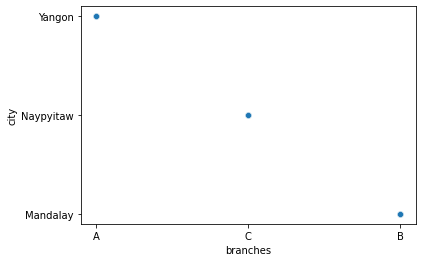

In [ ]:
sns.scatterplot(x = 'branches', y = 'city', data = data) 

In [ ]:
#As we can see from the plot, the city and branches has the same values meaning which is A = Yangon, B = Mandalay, C = Naypyitaw
#So we decided to match them into one column (name = branch). 
data['branch'] = data['branches'] + ' - ' + data['city']
data['branch'].value_counts()

A - Yangon       340
B - Mandalay     332
C - Naypyitaw    328
Name: branch, dtype: int64

In [ ]:
# Check for outliers and remove them if necessary
Q1 = data.quantity.quantile(0.25)
Q3 = data.quantity.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data.quantity < (Q1 - 1.5 * IQR)) |(data.quantity > (Q3 + 1.5 * IQR)))]

# Check for duplicate entries and remove them
data = data.drop_duplicates()

In [ ]:
#Now we can drop all the duplicate values columns.
data = data.drop('date', axis=1)
data = data.drop('time', axis=1)
data = data.drop('city', axis=1)
data = data.drop('branches', axis=1)
data.dtypes

invoices      object
customers     object
gender        object
products      object
unitprice    float64
quantity     float64
tax          float64
total        float64
payment       object
cogs         float64
ratings      float64
datetime      object
branch        object
dtype: object

In [ ]:
# Store the cleaned data into a new csv file
data.to_csv('cleaned_data.csv', index=False)

In [ ]:
clean_data = pd.read_csv('cleaned_data.csv')
clean_data.info() #See what attribute we have in new csv file.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   invoices   1000 non-null   object 
 1   customers  1000 non-null   object 
 2   gender     1000 non-null   object 
 3   products   1000 non-null   object 
 4   unitprice  1000 non-null   float64
 5   quantity   1000 non-null   float64
 6   tax        1000 non-null   float64
 7   total      1000 non-null   float64
 8   payment    1000 non-null   object 
 9   cogs       1000 non-null   float64
 10  ratings    1000 non-null   float64
 11  datetime   1000 non-null   object 
 12  branch     1000 non-null   object 
dtypes: float64(6), object(7)
memory usage: 101.7+ KB


### Create appropriate univariate plots for each attribute from the cleaned dataset. Use frequency tables for categorical data

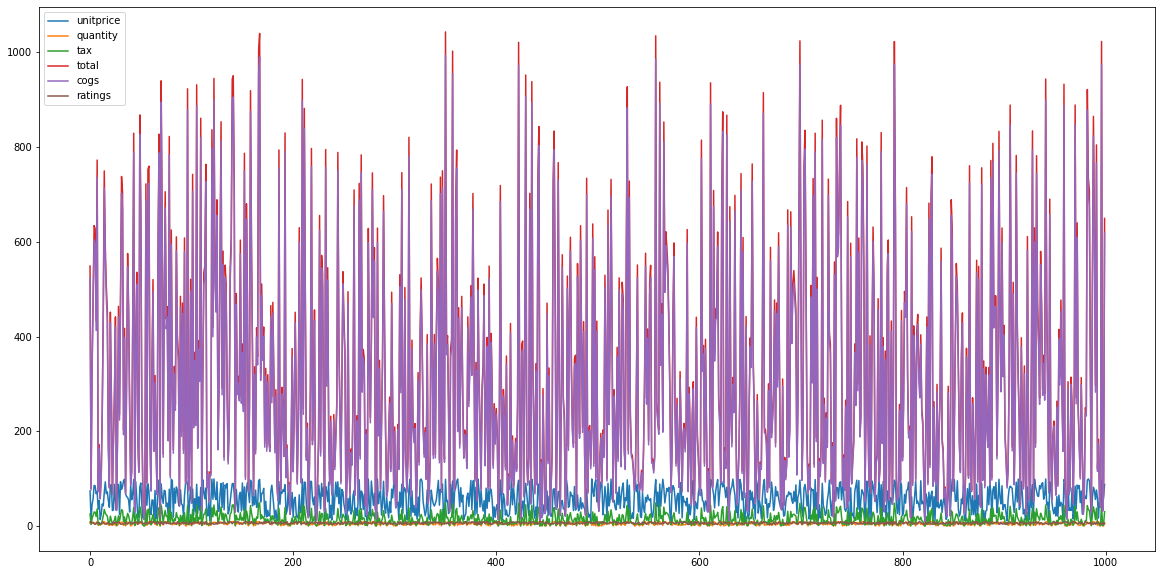

In [ ]:
#Plot feature distributions
clean_data.plot(figsize=(20,10))

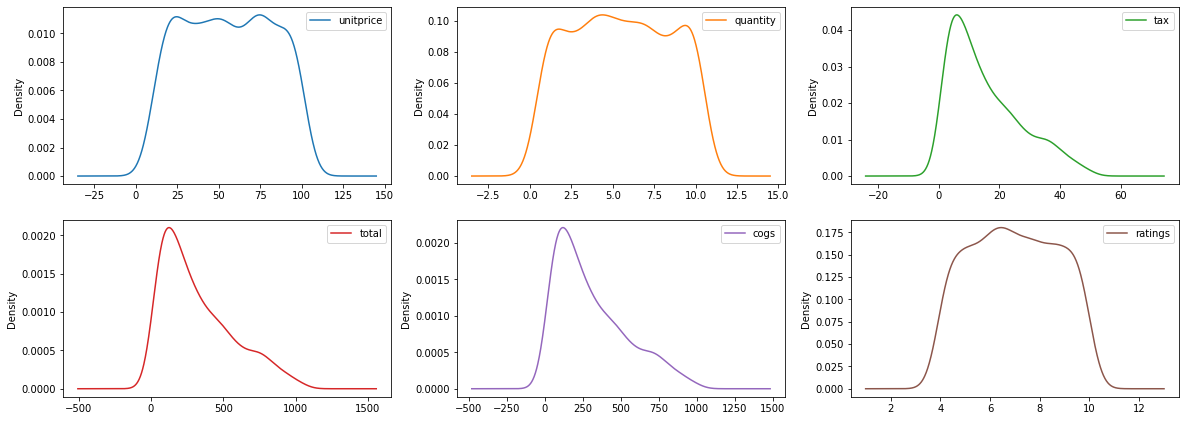

In [ ]:
#Plot the distribution of the values of each feature using KDE – kernel density estimate
clean_data.plot(kind='kde', subplots=True, layout=(4,3), figsize=(20, 15), sharex=False)
plt.show()

[Text(0.5, 1.0, 'Ratings')]

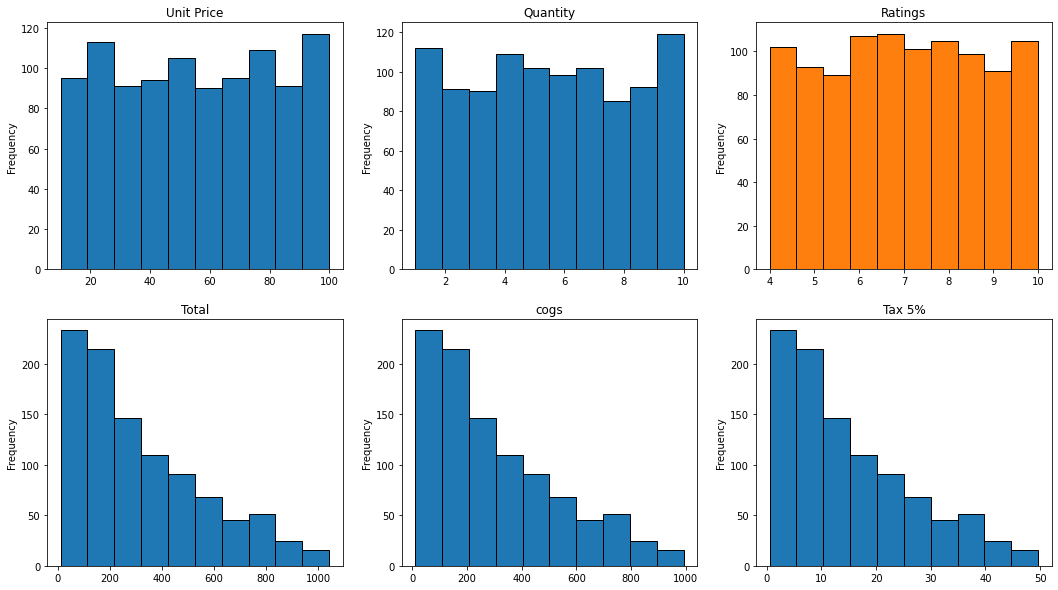

In [ ]:
# Plot histograms for numerical variables
fig, d = plt.subplots(2, 3, figsize=(18,10))

clean_data['unitprice'].plot.hist(ax = d[0][0], edgecolor='black').set(title = 'Unit Price')
clean_data['quantity'].plot.hist(ax = d[0][1], edgecolor='black').set(title = 'Quantity')
clean_data['tax'].plot.hist(ax = d[1][2], edgecolor='black').set(title = 'Tax 5%')
clean_data['total'].plot.hist(ax = d[1][0], edgecolor='black').set(title = 'Total')
clean_data['cogs'].plot.hist(ax = d[1][1], edgecolor='black').set(title = 'cogs')
clean_data['ratings'].plot.hist(ax = d[0][2], edgecolor='black').set(title = 'Ratings')
clean_data['ratings'].plot.hist(ax = d[0][2], edgecolor='black').set(title = 'Ratings')

[Text(0.5, 1.0, 'Product Type')]

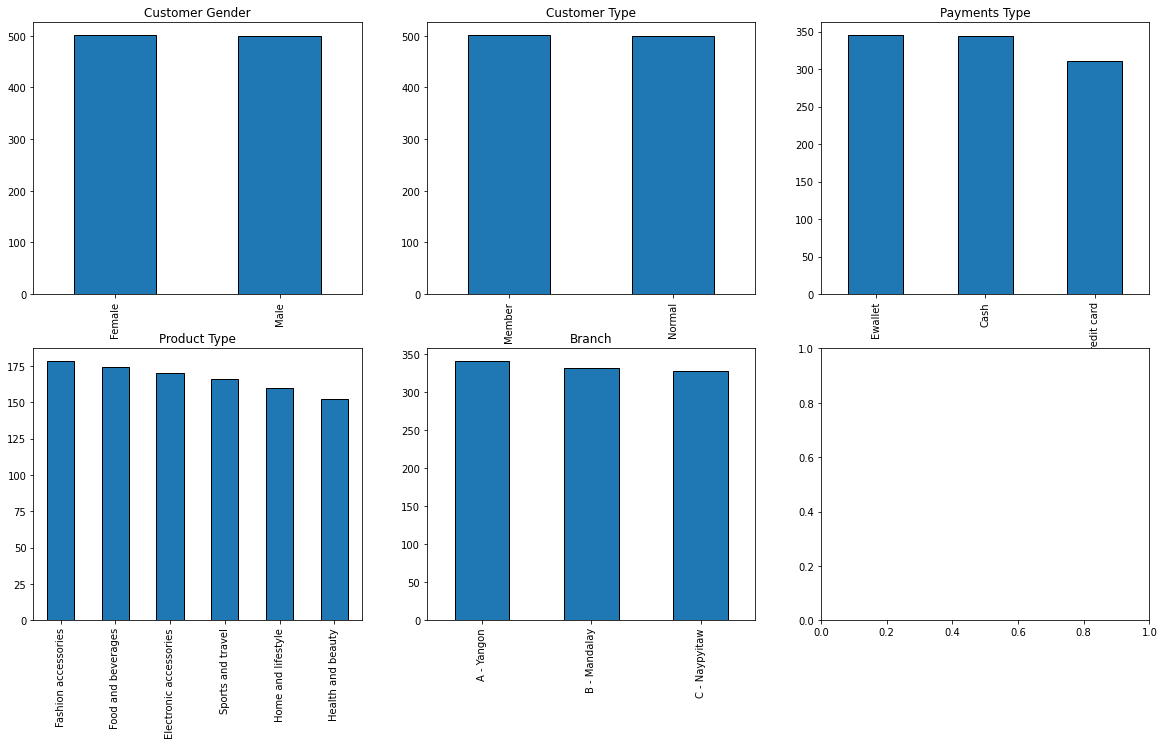

In [ ]:
# Plot bar plots for categorical variables
fig, d = plt.subplots(2, 3, figsize=(20,11))

clean_data['branch'].value_counts().plot.bar(ax = d[1][1], edgecolor='black').set(title = 'Branch')
clean_data['customers'].value_counts().plot.bar(ax = d[0][1], edgecolor='black').set(title = 'Customer Type')
clean_data['payment'].value_counts().plot.bar(ax = d[0][2], edgecolor='black').set(title = 'Payments Type')
clean_data['gender'].value_counts().plot.bar(ax = d[0][0], edgecolor='black').set(title = 'Customer Gender')
clean_data['products'].value_counts().plot.bar(ax = d[1][0], edgecolor='black').set(title = 'Product Type')

In [ ]:
# 2) Use frequency tables for categorical data
cat_vars = ['branch', 'customers', 'gender', 'products', 'payment']
for var in cat_vars:
    print(clean_data[var].value_counts().to_frame())
    print()

               branch
A - Yangon        340
B - Mandalay      332
C - Naypyitaw     328

        customers
Member        501
Normal        499

        gender
Female     501
Male       499

                        products
Fashion accessories          178
Food and beverages           174
Electronic accessories       170
Sports and travel            166
Home and lifestyle           160
Health and beauty            152

             payment
Ewallet          345
Cash             344
Credit card      311



### Select appropriate summary statistics to describe the center, spread for each numerical variable, and provide justification of the same.

In [ ]:
num_vars = ['unitprice', 'quantity', 'tax', 'total', 'ratings', 'cogs'] # Select numerical variables

for var in num_vars: # Calculate and display the summary statistics for each numerical variable
    print(clean_data[var].describe().to_frame())
    print("")

         unitprice
count  1000.000000
mean     55.672130
std      26.494628
min      10.080000
25%      32.875000
50%      55.230000
75%      77.935000
max      99.960000

          quantity
count  1000.000000
mean      5.510000
std       2.923431
min       1.000000
25%       3.000000
50%       5.000000
75%       8.000000
max      10.000000

               tax
count  1000.000000
mean     15.379369
std      11.708825
min       0.508500
25%       5.924875
50%      12.088000
75%      22.445250
max      49.650000

             total
count  1000.000000
mean    322.966749
std     245.885335
min      10.678500
25%     124.422375
50%     253.848000
75%     471.350250
max    1042.650000

          ratings
count  1000.00000
mean      6.97270
std       1.71858
min       4.00000
25%       5.50000
50%       7.00000
75%       8.50000
max      10.00000

             cogs
count  1000.00000
mean    307.58738
std     234.17651
min      10.17000
25%     118.49750
50%     241.76000
75%     448.90500
max  

Above we see the output for the mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum for each numerical variable

# Task 2 – Descriptive Statistics (bivariate and multivariate plots) 

### Plot a correlation matrix for all the numerical variables and interpret the results 

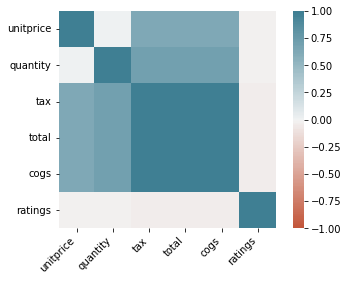

In [ ]:
corr = clean_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The output is a heatmap showing the correlation between each pair of numerical variables. The darker the color, the stronger the correlation

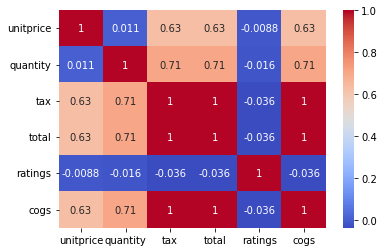

In [ ]:
# Another way to calculate the correlation matrix using seaborn (more accurate)
corr_matrix = clean_data[num_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') # Plot the correlation matrix using a heatmap
plt.show()

### Based on univariate analysis and correlation matrix, generate (at least 10) and discuss appropriate bivariate and multivariate plots/tables/proportions.

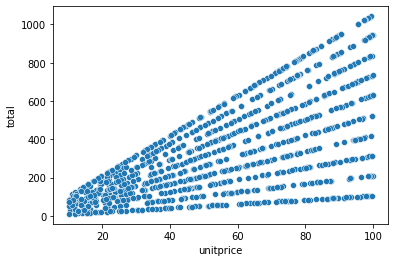

In [ ]:
# 1) Scatter plot of 'unitprice' and 'total'
sns.scatterplot(x='unitprice', y='total', data = clean_data)
plt.show()

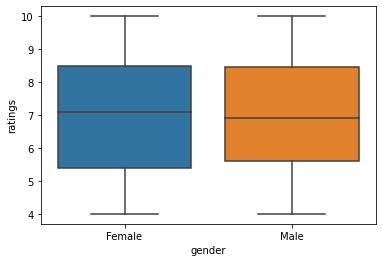

In [ ]:
# 2) Box plot of 'ratings' by 'gender'
sns.boxplot(x='gender', y='ratings', data=clean_data)
plt.show()

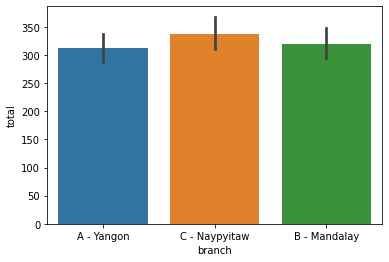

In [ ]:
# 3) Bar plot of mean 'total' by 'branch'
sns.barplot(x='branch', y='total', data=clean_data)
plt.show()

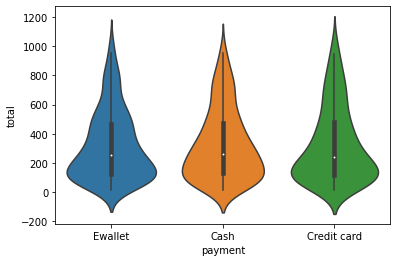

In [ ]:
# 4) Violin plot of 'total' by 'payment'
sns.violinplot(x='payment', y='total', data=clean_data)
plt.show()

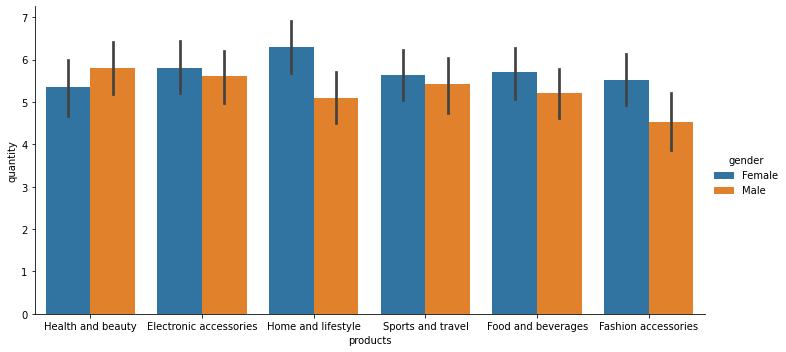

In [ ]:
# 5) Grouped bar plot of 'quantity' by 'products' and 'gender'
sns.catplot(x='products', y='quantity', hue='gender', kind='bar', data=clean_data, height=5, aspect=2)
plt.show()

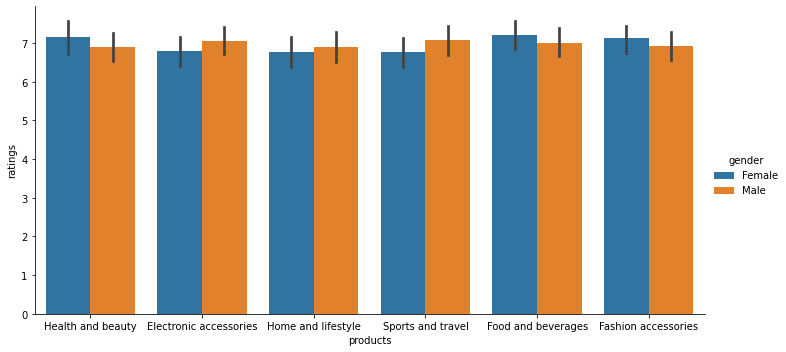

In [ ]:
# 6) Grouped bar plot of 'ratings' by 'products' and 'gender'
sns.catplot(x='products', y='ratings', hue='gender', kind='bar', data=clean_data, height=5, aspect=2)
plt.show()

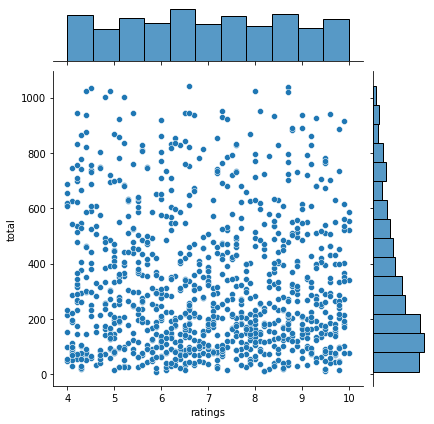

In [ ]:
# 7) Joint plot of 'ratings' and 'total'
sns.jointplot(x='ratings', y='total', data=clean_data)
plt.show()

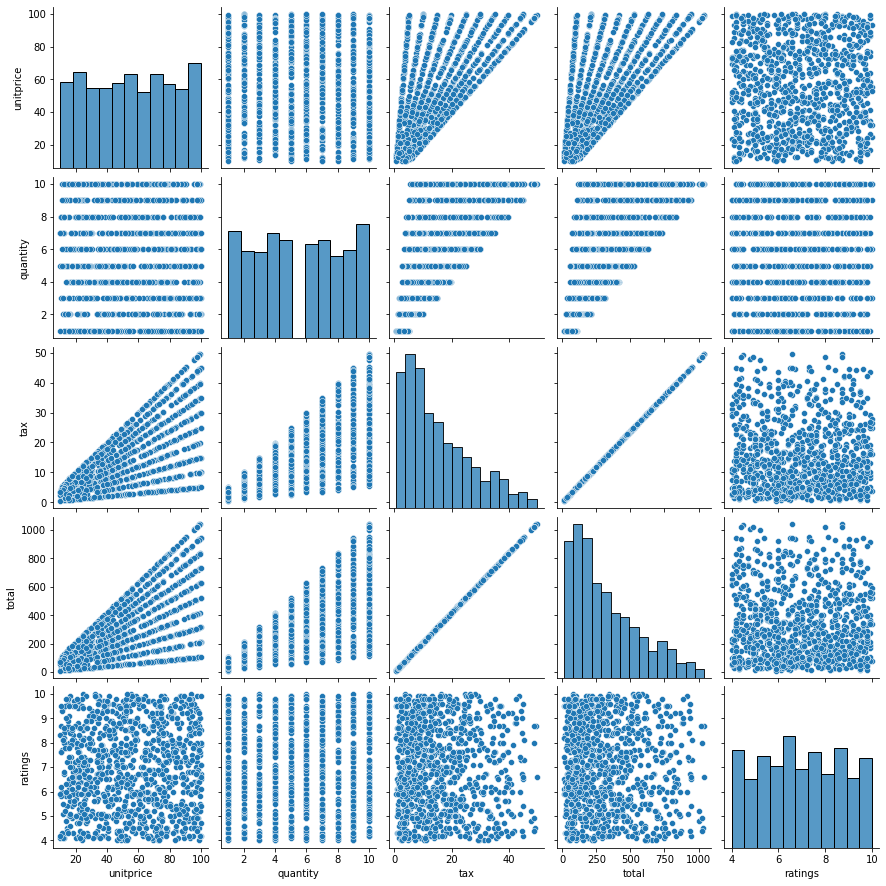

In [ ]:
# 8) Pair plot of all numerical variables
sns.pairplot(clean_data[['unitprice', 'quantity', 'tax', 'total', 'ratings']])
plt.show()

In [ ]:
# 9) Proportion of 'payment' methods
payment_proportions = clean_data['payment'].value_counts() / len(clean_data)
print(payment_proportions)

Ewallet        0.345
Cash           0.344
Credit card    0.311
Name: payment, dtype: float64


In [ ]:
# 10) Crosstab of 'branch' and 'gender'
branch_city_ct = pd.crosstab(index=clean_data['branch'], columns=clean_data['gender'])
print(branch_city_ct)

gender         Female  Male
branch                     
A - Yangon        161   179
B - Mandalay      162   170
C - Naypyitaw     178   150


In [ ]:
# 11) Crosstab of 'branch' and 'payment'
branch_city_ct = pd.crosstab(index=clean_data['branch'], columns=clean_data['payment'])
print(branch_city_ct)

payment        Cash  Credit card  Ewallet
branch                                   
A - Yangon      110          104      126
B - Mandalay    110          109      113
C - Naypyitaw   124           98      106


### Pick any two feature pairs that are highly correlated and test their distributions using normal Quantile and QQ plots to determine if the distribution is close to normal. Also, measure the **kurtosis** and **skew of the features** chosen. 

In [ ]:
# Select two features that are highly correlated
feat1 = 'quantity'
feat2 = 'total'

# Calculate the kurtosis and skew of the features
kurtosis1 = stats.kurtosis(clean_data[feat1])
skew1 = stats.skew(clean_data[feat1])
kurtosis2 = stats.kurtosis(clean_data[feat2])
skew2 = stats.skew(clean_data[feat2])

print(f'Kurtosis of {feat1}: {kurtosis1:.2f}')
print(f'Skew of {feat1}: {skew1:.2f}')
print(f'Kurtosis of {feat2}: {kurtosis2:.2f}')
print(f'Skew of {feat2}: {skew2:.2f}')

Kurtosis of quantity: -1.22
Skew of quantity: 0.01
Kurtosis of total: -0.09
Skew of total: 0.89


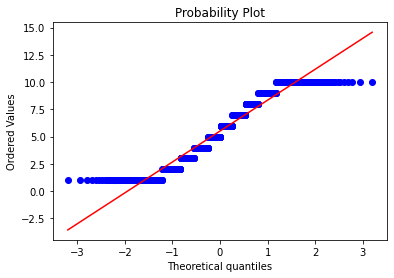

In [ ]:
# Plot normal quantile plot for feature 1
stats.probplot(clean_data[feat1], plot=sns.mpl.pyplot)
plt.show()

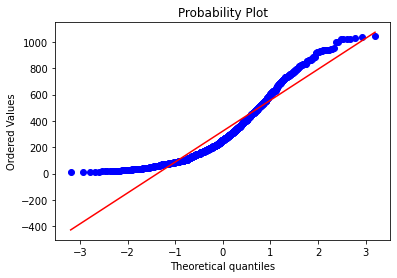

In [ ]:
# Plot normal quantile plot for feature 2
stats.probplot(clean_data[feat2], plot=sns.mpl.pyplot)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


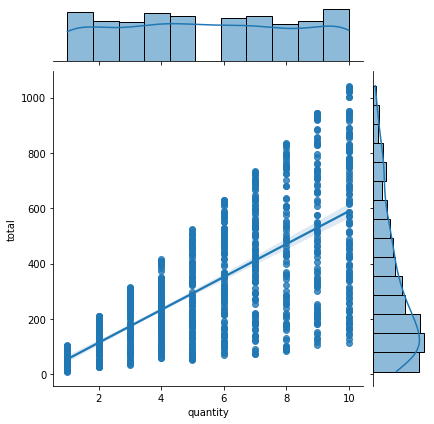

In [ ]:
# Plot QQ plot for features 1 and 2
sns.jointplot(feat1, feat2, data=clean_data, kind='reg')
plt.show()

We see the kurtosis and skew of the two features, as well as normal quantile plots and a QQ plot for each feature. A normal quantile plot displays the quantiles of the feature compared to the quantiles of a normal distribution, and a QQ plot displays the quantiles of one feature compared to the quantiles of another feature. A straight line indicates that the distribution of the feature is close to normal

#Task 3 – Statistical Inference

### State and carry out two 1-sample hypothesis test for a numerical variable (use mean or median)

In [ ]:
variable = 'unitprice' # Our numerical variable

# Define the null and alternative hypotheses
# Hypothesis 1: The mean unit price is equal to 10
hypothesis1_null = 10
hypothesis1_alternative = 'not equal to'

# Hypothesis 2: The median unit price is equal to 12
hypothesis2_null = 12
hypothesis2_alternative = 'not equal to'

# Perform the 1-sample t-test for hypothesis 1
t_statistic, p_value = stats.ttest_1samp(clean_data[variable], hypothesis1_null)

# Interpret the results of hypothesis 1
if p_value < 0.05:
    print(f'The p-value ({p_value:.3f}) is less than 0.05, so we reject the null hypothesis that the mean unit price is {hypothesis1_alternative} {hypothesis1_null}')
else:
    print(f'The p-value ({p_value:.3f}) is greater than 0.05, so we fail to reject the null hypothesis that the mean unit price is {hypothesis1_alternative} {hypothesis1_null}')

# Perform the 1-sample z-test for hypothesis 2
z_statistic, p_value = stats.wilcoxon(clean_data[variable] - hypothesis2_null)

# Interpret the results of hypothesis 2
if p_value < 0.05:
    print(f'The p-value ({p_value:.3f}) is less than 0.05, so we reject the null hypothesis that the median unit price is {hypothesis2_alternative} {hypothesis2_null}')
else:
    print(f'The p-value ({p_value:.3f}) is greater than 0.05, so we fail to reject the null hypothesis that the median unit price is {hypothesis2_alternative} {hypothesis2_null}')


The p-value (0.000) is less than 0.05, so we reject the null hypothesis that the mean unit price is not equal to 10
The p-value (0.000) is less than 0.05, so we reject the null hypothesis that the median unit price is not equal to 12


### State and carry out one 2-sample hypothesis test for numerical variables (use mean or median)

In [ ]:
variable1 = 'unitprice'
variable2 = 'quantity'

# Define the null and alternative hypotheses
null_hypothesis = 0
alternative_hypothesis = 'not equal to'

# Perform the 2-sample t-test
t_statistic, p_value = stats.ttest_ind(clean_data[variable1], clean_data[variable2], equal_var=False)

# Interpret the results
if p_value < 0.05:
    print(f'The p-value ({p_value:.3f}) is less than 0.05, so we reject the null hypothesis that the means of {variable1} and {variable2} are {alternative_hypothesis} {null_hypothesis}')
else:
    print(f'The p-value ({p_value:.3f}) is greater than 0.05, so we fail to reject the null hypothesis that the means of {variable1} and {variable2} are {alternative_hypothesis} {null_hypothesis}')

The p-value (0.000) is less than 0.05, so we reject the null hypothesis that the means of unitprice and quantity are not equal to 0


### State and carry out one 2-sample hypothesis test that involves categorical variable(s) (use proportions)

In [ ]:
# variable1 = 'total'
# variable2 = 'gender'

# # Define the null and alternative hypotheses
# null_hypothesis = 0
# alternative_hypothesis = 'not equal to'

# # Perform the 2-sample t-test
# t_statistic, p_value = stats.ttest_ind(clean_data[variable1], clean_data[variable2], equal_var=False)

# # Interpret the results
# if p_value < 0.05:
#     print(f'The p-value ({p_value:.3f}) is less than 0.05, so we reject the null hypothesis that the means of {variable1} and {variable2} are {alternative_hypothesis} {null_hypothesis}')
# else:
#     print(f'The p-value ({p_value:.3f}) is greater than 0.05, so we fail to reject the null hypothesis that the means of {variable1} and {variable2} are {alternative_hypothesis} {null_hypothesis}')